**Probing Kepler and TESS Eclipsing Binary star catalogs to search for entries present in the former catalog and not the latter. Specifically searching for Binaries missing from first two years of TESS operation, which includes the first 26 Sectors of data and includedin [Prsa et al. 2022](https://ui.adsabs.harvard.edu/abs/2022yCat..22580016P/abstract)** 

Villanova REU Project, Summer 2024-2025. Code written by Ronnie Banerjee, supervised and edited by Dr. Andrej Prsa. [Results published in RNAAS Journal](https://iopscience.iop.org/article/10.3847/2515-5172/ade853)

In [1]:
import sys 
print(sys.version)

3.9.12 (main, Apr  5 2022, 06:56:58) 
[GCC 7.5.0]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import astroquery
from astroquery.simbad import Simbad #https://astroquery.readthedocs.io/en/latest/simbad/simbad.html
import lightkurve as lk
from astropy.io import ascii
import astropy.units as u
from astroquery.mast import Observations
from scipy.signal import find_peaks 

In [2]:
#probing whole catalog
limitedSimbad = Simbad()
limitedSimbad.ROW_LIMIT = 25
eb = ascii.read('KIC_EBS.txt') #this doesn't freak out like np.loadtxt

kic = list(eb['col1'])

print(type(kic))
print(len(kic))
print(kic) #store kic ids


kicid = [] #store the full ids of kepler targets


<class 'list'>
2920
[3863594, 10417986, 8912468, 8758716, 10855535, 9472174, 9612468, 6613627, 5302006, 9898401, 7375612, 5872696, 7767774, 12350008, 10684673, 9532219, 6699679, 6287172, 11825204, 4921906, 6387887, 8288741, 12055255, 11013201, 8108785, 1572353, 10288502, 10453521, 9238207, 5166136, 8555795, 6144827, 10030943, 10965091, 2715417, 11413213, 9077796, 6050116, 12458797, 6350020, 7198474, 7546791, 7871200, 7959612, 3972629, 9345163, 8816790, 12216817, 11494583, 4738426, 8122124, 9032671, 5960283, 9412114, 9004380, 4857282, 12602985, 11336707, 12104285, 8367007, 11769739, 4138301, 9478836, 12508348, 5685072, 3839964, 12598713, 9700154, 9662581, 9777987, 2856960, 5611561, 7339345, 9288175, 9392331, 9239684, 12004834, 11284547, 8045121, 6106771, 10557008, 5785551, 9388303, 5773205, 2437038, 7269843, 6072578, 8028158, 2435971, 9026766, 10802917, 3832382, 7697065, 9760531, 5956588, 3743834, 9935311, 11704155, 2448320, 7335517, 8739802, 4385109, 4563150, 5104097, 9772642, 8624778,

In [4]:
limitedSimbad = Simbad()
limitedSimbad.ROW_LIMIT = 35

tic = [] #kic targets with tic ids
for i in kic[2450:2920]: #search thru kepler ebs in index chunks and and add KIC identifier to the id number
        kicid.append("KIC "+ str(i)) #lists are better


for x in kicid:#search list of kic ebs, KIC 8937663 is a problematic one why, cant even find tic id
    #print(x)
    result_table2 = Simbad.query_objectids(x) #use these to find this target in other catalogs
    
    for y in result_table2['ID']: #search the target's alternate ids
        if y.__contains__("TIC"):#if it has a tic id
            tic.append(y)
 


 print(tic)
#loop through, see if there are graphs available in sc for targets, if they aren't there, log those for further research 

['TIC 121941586', 'TIC 271662352', 'TIC 138570594', 'TIC 159719243', 'TIC 158386629', 'TIC 405685992', 'TIC 159719826', 'TIC 168814138', 'TIC 137212833', 'TIC 63125816', 'TIC 158490928', 'TIC 27992902', 'TIC 138648606', 'TIC 158423582', 'TIC 159172516', 'TIC 170347611', 'TIC 271252857', 'TIC 122226990', 'TIC 279918148', 'TIC 169818468', 'TIC 272372621', 'TIC 273376048', 'TIC 271671025', 'TIC 298969745', 'TIC 26416896', 'TIC 351908004', 'TIC 299154544', 'TIC 28233762', 'TIC 170232686', 'TIC 168814075', 'TIC 170253873', 'TIC 138303447', 'TIC 138303452', 'TIC 138303412', 'TIC 158629199', 'TIC 120319930', 'TIC 171502366', 'TIC 171584878', 'TIC 271766528', 'TIC 159176945', 'TIC 272719408', 'TIC 137977326', 'TIC 272179657', 'TIC 138093387', 'TIC 120421879', 'TIC 273372823', 'TIC 137214983', 'TIC 138425189', 'TIC 120254134', 'TIC 137341200', 'TIC 26412786', 'TIC 164457525', 'TIC 171879741', 'TIC 416283814', 'TIC 169822548', 'TIC 164830805', 'TIC 158322061', 'TIC 378010965', 'TIC 272369124', '

In [5]:
#use this list to search for targets and plot their tps, 138806620 not there
no_obs= []
sc_obs = []
for i in tic:
    lcsearch = lk.search_lightcurve(i, cadence = "short")
    dwn = lk.SearchResult.download(lcsearch) 
    if dwn is None: #if its not observed in sc aka no search result is found
        no_obs.append(i)
        continue #move on past the null
    else: #moving on and seeing if others have been observed
        sc_obs.append(i)
print("Observed in short cadence by TESS:", sc_obs)
print("\n Not observed by TESS in short cadence:", no_obs)



/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_a

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `d

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-pack

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 15 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-pack

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_al

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 9 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_al

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:419: LightkurveWarning: Cannot download from an empty search result.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/

Observed in short cadence by TESS: ['TIC 121941586', 'TIC 159719243', 'TIC 405685992', 'TIC 159719826', 'TIC 137212833', 'TIC 63125816', 'TIC 27992902', 'TIC 138648606', 'TIC 159172516', 'TIC 170347611', 'TIC 122226990', 'TIC 279918148', 'TIC 273376048', 'TIC 271671025', 'TIC 298969745', 'TIC 299154544', 'TIC 170232686', 'TIC 170253873', 'TIC 138303452', 'TIC 120319930', 'TIC 171584878', 'TIC 159176945', 'TIC 272719408', 'TIC 137977326', 'TIC 272179657', 'TIC 138093387', 'TIC 273372823', 'TIC 137214983', 'TIC 138425189', 'TIC 120254134', 'TIC 164457525', 'TIC 416283814', 'TIC 169822548', 'TIC 164830805', 'TIC 272369124', 'TIC 158215322', 'TIC 159716346', 'TIC 121122016', 'TIC 273582296', 'TIC 164886585', 'TIC 272487801', 'TIC 27647953', 'TIC 138037456', 'TIC 268711054', 'TIC 123230202', 'TIC 273129461', 'TIC 137411481', 'TIC 27396969', 'TIC 169820068', 'TIC 158632564', 'TIC 123445835', 'TIC 63122603', 'TIC 271040487', 'TIC 271040482', 'TIC 158795062', 'TIC 138971394', 'TIC 120764848', 

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 3 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packa

In [6]:
#finding Kepler EBs also observed by TESS in first 26 Sectors of data.
for i in kic: #search thru kepler ebs and and add KIC identifier to the id number
        kicid.append("KIC "+ str(i)) #lists are better
no_obs2 = []
sc_obs2 = []
for i in sc_obs: #remove TIC identifier to easily compare with the catalog 
    sc_obs2.append( i.replace("TIC ", "") )
for i in no_obs: #remove TIC identifier to easily compare with the catalog 
    no_obs2.append( i.replace("TIC ", "") )
print("Kepler EBs observed by TESS in this sample:",len(sc_obs2))
#print(no_obs2)
eb2 = ascii.read('TESS_EB_catalog.csv')
#print(eb2)
tesscatalog = list(eb2['tess_id'])
tesscatalog = set(tesscatalog)

observed = set(sc_obs2)
not_observed = set(no_obs2)
missing_tics = list(observed.difference(tesscatalog))

print("EBs after filtering:",len(missing_tics))
print("KIC EBs that are not in VU catalog (TIC ID):",missing_tics) #two confirmed ebs are showing up here? the set doesn't show them


Kepler EBs observed by TESS in this sample: 568
EBs after filtering: 283
KIC EBs that are not in VU catalog (TIC ID): ['159443078', '268711054', '271763138', '172422432', '158791692', '351061627', '171584878', '159512595', '137414680', '271433551', '272177504', '394177355', '158324163', '273687627', '121988489', '267667927', '137220754', '159649612', '27773627', '164785576', '171878296', '170347611', '271546585', '274127085', '164729556', '122299251', '122685666', '273372823', '272718764', '138424223', '270522064', '137555691', '158420787', '123410791', '170740081', '159097856', '270856764', '169460096', '27846645', '122226990', '137890266', '159719826', '298969298', '299159803', '63293840', '271970252', '159106207', '399825512', '271772050', '158720466', '405685992', '158795062', '171502734', '159573888', '275575491', '351191325', '120254134', '164890208', '272841237', '351193098', '159716878', '122447138', '26960947', '417657237', '27390859', '272369124', '138648606', '273376048', '1

In [44]:
#busy work. adding TIC to start of each ID for easier lightkurve search
missing_tic_withid  = []
for i in missing_tics: #re add tic identifier
        missing_tic_withid.append("TIC "+ str(i)) #lists are better
print(missing_tic_withid)
for x in missing_tic_withid:
    lc = lk.search_lightcurve(x, cadence = "short",mission = "TESS").download()
    print(type(lc))
    missing_collection = lk.LightCurveCollection.append(lc) #compile into one place
print(lc)


NameError: name 'missing_tics' is not defined

['TESS Sector 14' 'TESS Sector 40' 'TESS Sector 41' 'TESS Sector 54'
 'TESS Sector 55' 'TESS Sector 75' 'TESS Sector 80' 'TESS Sector 81'
 'TESS Sector 75' 'TESS Sector 80' 'TESS Sector 81' 'TESS Sector 14']
Eclipse indices: [  125   387   638   917  1203  1408  1622  1842  2052  2293  2546  2832
  3049  3385  3687  3998  4275  4520  4838  5044  8482  8767  9087  9352
  9598  9914 10127 10515 10722 10924 11144 11466 11681 11935 12254 12525
 12842 13045 13373 13722 14009 14231 14593 17847 18096 18385]
eclipse times: [1683.53036351 1683.92341947 1684.27897529 1684.67064219 1685.06925349
 1685.35397582 1685.65119813 1685.95675376 1686.24842047 1686.58314272
 1686.9345316  1687.33175377 1687.63314258 1688.12480908 1688.56647553
 1689.00953081 1689.40814162 1689.75536355 1690.20258534 1690.48869616
 1695.33035696 1695.72619023 1696.1720236  1697.50118273 1697.85534575
 1698.30117433 1698.59839332 1699.14005404 1699.4303286  1699.71088102
 1700.02059977 1700.46781692 1700.76642462 1701.11919

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


7.971982230463312 d


<AxesSubplot:xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

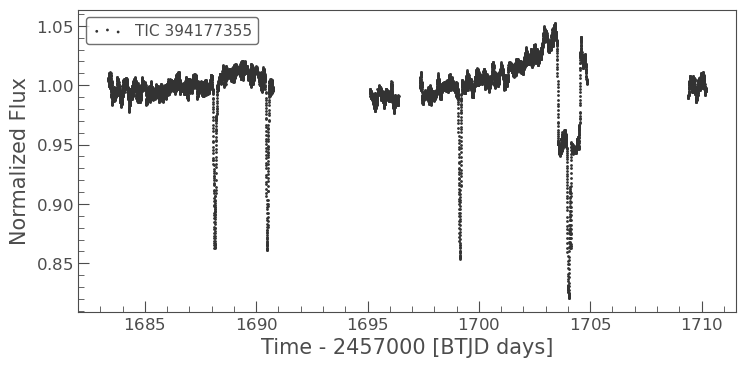

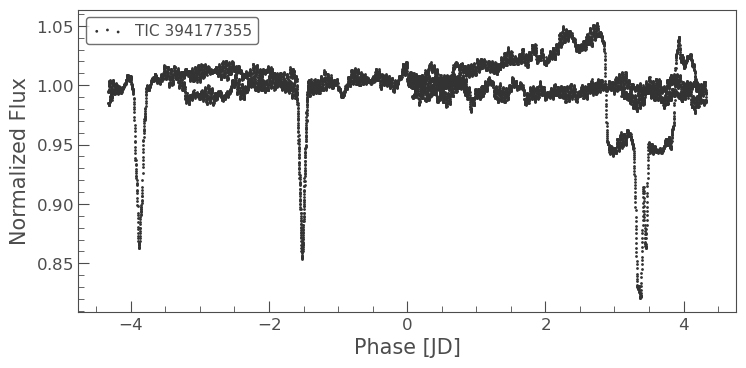

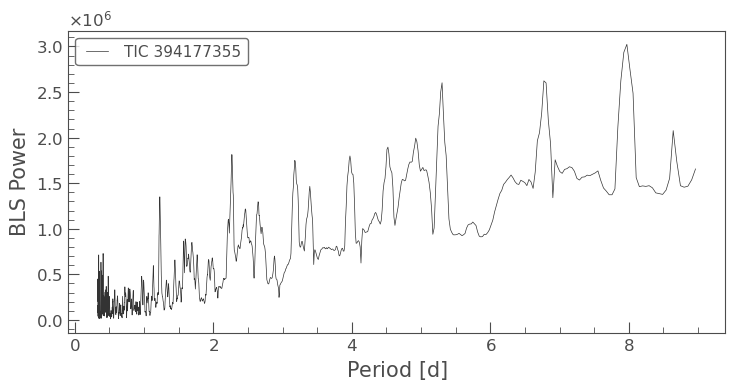

In [15]:
#not necessary for full running of script, just for visualizing data and finding which sectors.

lcsearch = lk.search_lightcurve("TIC 394177355", cadence = "short",mission = "TESS")
print(lcsearch.mission) #which sectors
curve = lcsearch.download()
# Invert flux to turn minima into peaks
inv_flux = -curve.flux

# Find peaks in the inverted flux = minima in original flux
# You can tweak `distance` and `prominence` depending on your data
peaks, properties = find_peaks(inv_flux, distance=200, prominence=0.01)

# `peaks` now contains the indices of all candidate eclipses
print("Eclipse indices:", peaks)
eclipse_times = curve.time.value[peaks]
print("eclipse times:", eclipse_times)
curve = curve.normalize()
curve.scatter()
period = curve.to_periodogram("bls").period_at_max_power #take lc, grab max peak period
periodogram = curve.to_periodogram("bls")
print(period)
curve.fold(8.653092).scatter()
periodogram.plot()



In [2]:
#subplot of all missing ebs pre sector 26

pre26 = ascii.read('Pre_Sec26_Kepler_EBs.csv')
print(pre26)
pre26 = list(pre26['col2'])
for i in range(len(pre26)):
    pre26[i] = "TIC " + str(pre26[i])

print(pre26)
plots = []
periods = []
graphs = []

for i in pre26:
    lcsearch = lk.search_lightcurve(i, cadence = "short") #store plotting data
    dwn = lk.SearchResult.download(lcsearch) 
    plots.append(dwn)
print(len(plots))
for x in range(len(plots)): #store max periods for phase folding
    pds = plots[x].to_periodogram("bls").period_at_max_power
    periods.append(pds)
print(periods)
print(len(periods))
# for y in range(len(plots)):
#     for z in (periods):
         #temp = plots[y].fold(z)
         #print(temp)

col1    col2  
---- ---------
 TIC 158173344
 TIC 271545274
 TIC 164414084
 TIC 271542951
 TIC 417678051
 TIC 158786524
 TIC 158321843
 TIC 394177355
 TIC 272841223
 TIC 158386775
 TIC 121786759
 TIC 123445947
 TIC 399826900
 TIC 121731973
 TIC 271668967
 TIC  28226273
 TIC 184427953
 TIC 351802641
 TIC  63451825
 TIC 120764848
 TIC 170740143
['TIC 158173344', 'TIC 271545274', 'TIC 164414084', 'TIC 271542951', 'TIC 417678051', 'TIC 158786524', 'TIC 158321843', 'TIC 394177355', 'TIC 272841223', 'TIC 158386775', 'TIC 121786759', 'TIC 123445947', 'TIC 399826900', 'TIC 121731973', 'TIC 271668967', 'TIC 28226273', 'TIC 184427953', 'TIC 351802641', 'TIC 63451825', 'TIC 120764848', 'TIC 170740143']


/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 13 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/home/rbanerjee02/anaconda3/lib/python3.9/site-pack

21
[<Quantity 0.44557743 d>, <Quantity 0.77313444 d>, <Quantity 3.907699 d>, <Quantity 4.00785759 d>, <Quantity 3.74619541 d>, <Quantity 7.10638763 d>, <Quantity 4.22079085 d>, <Quantity 7.97198223 d>, <Quantity 0.5879858 d>, <Quantity 0.78612123 d>, <Quantity 4.76075743 d>, <Quantity 3.10196158 d>, <Quantity 3.32496106 d>, <Quantity 4.72389915 d>, <Quantity 3.82509184 d>, <Quantity 5.88614429 d>, <Quantity 8.92483031 d>, <Quantity 5.22479739 d>, <Quantity 2.96569307 d>, <Quantity 7.25173793 d>, <Quantity 2.15223599 d>]
21


In [3]:
#part of normalizing data and finding out of eclipse portions
def getOOE(dataframe, jump_threshold):
    '''Identifies out-of-eclipse (OOE) data points in a light curve'''
    print("Inside getOOE: Data length:", len(dataframe))
    print("Threshold:", jump_threshold)
    
    Npts = len(dataframe)
    if Npts < 5:  # Prevent errors with very short datasets
        print("Warning: Not enough data points!")
        return np.arange(Npts)

    median_raw = np.nanmedian(dataframe["flux"])
    std_flux = np.nanstd(dataframe["flux"])  # Standard deviation of flux

    # Compute a running median every 3 points
    medians = np.zeros(Npts)
    for i in range(Npts):
        if i < Npts - 2:
            medians[i] = np.nanmedian(dataframe["flux"].iloc[[i, i+1, i+2]])
        elif i == Npts - 2:
            medians[i] = np.nanmedian(dataframe["flux"].iloc[[i, i+1]])
        else:
            medians[i] = dataframe["flux"].iloc[i]

    # Check for points where the median changes by too much
    bool_keep = np.ones(Npts, dtype=bool)  # Start with all points being kept
    for i in range(Npts - 1):
        if (
            abs(medians[i] - medians[i+1]) > jump_threshold * median_raw or
            abs(medians[i] - median_raw) > 5 * std_flux  # Adaptive threshold, so as to not exclude too many data pts for some targets
        ):
            bool_keep[i] = False  # Only flag this point instead of large ranges

    indx_OOE = np.where(bool_keep)[0]
    print(f"Indices returned: {indx_OOE} (Total: {len(indx_OOE)})")
    
    if len(indx_OOE) == 0:
        print("Warning: No out-of-eclipse points found! Try increasing jump_threshold.")
    
    return indx_OOE

In [4]:
#for manually phase folding
from astropy.timeseries import BoxLeastSquares
proper_periods = []
phases = []
normalized_fluxes = []
bjd0 = []
phase1 = []
phase3 = []

for i in range(len(pre26)):
    # Use lightkurve to download the TESS data for TIC 356.
    search_result = lk.search_lightcurve(pre26[i])
    # indx_lc = np.where(search_result.table["author"] == "SPOC")[0] 
    # lc_many = search_result[indx_lc].download_all()
    lc_many = search_result.download_all()
    # There are 3 sectors of TESS data for TIC 356. Convert them all to pandas arrays.
    data0_raw, data1_raw, data2_raw = lc_many[0].to_pandas(), lc_many[1].to_pandas(), lc_many[2].to_pandas() 
    #times0, times1, times2 = data0.index, data1.index, data2.index

    # In each sector, get rid of any rows that have NaN flux values. (doesn't work for some targets)
    #   First sector:
    print(data0_raw['flux'])
    indx_ok = np.where(np.isfinite(data0_raw["flux"]))[0]
    data0 = data0_raw.filter(items=data0_raw.index[indx_ok], axis=0)
    print(data0['flux'])
    #   Second sector:
    indx_ok = np.where(np.isfinite(data1_raw["flux"]))[0]
    data1 = data1_raw.filter(items=data1_raw.index[indx_ok], axis=0)
    #   Third sector:
    indx_ok = np.where(np.isfinite(data2_raw["flux"]))[0]
    data2 = data2_raw.filter(items=data2_raw.index[indx_ok], axis=0)

    Npts0, Npts1, Npts2 = len(data0), len(data1), len(data2)

        # Identify the out-of-eclipse points.
    indx_outofeclipse = getOOE(data0,20) # call getOOE() here!
    print(indx_outofeclipse)
    #   Normalize by the out-of-eclipse median.
    #
    #  1. Compute the median of the flux column, but only at the out-of-eclipse points
    median0 = np.nanmedian(data0['flux'].iloc[indx_outofeclipse])
    print(median0)
    #
    #  2. Take the median of the out-of-eclipse points' error bars
    median0_err =  np.nanmedian(data0['flux_err'].iloc[indx_outofeclipse])
    #
    #  3. Divide flux by the median, then propagate the uncertainties.
    data0_normed = data0[["flux", "flux_err"]].copy()  # initializing the dataframe! leave this here!
    data0_normed["flux"] = data0_normed['flux']/median0
    print(data0_normed)
    data0_normed["flux_err"] = data0_normed['flux_err']/median0_err
    normalized_fluxes.append(data0_normed["flux"])

    N_periods = 1000    # definitely should be >500
    period_min = 0.5   # good idea to leave this as-is
    period_max = 25.0  # change this if you really want
    # print(data0['timecorr'])
    # Here we compute the periodogram:
    model = BoxLeastSquares(np.array(data0.index),data0_normed['flux'],data0_normed['flux_err'])  # make sure to include the "dy" argument
    periods_attempt = np.linspace(period_min, period_max, N_periods)
    periodogram = model.power(periods_attempt, 0.2)

    # Here is some code that will choose the top 3 periods:
    mypowers = np.copy(periodogram.power)
    #print(mypowers)
    indx_sorted = (-mypowers).argsort()
    # print(indx_sorted)
    p1, p2, p3 = periodogram.period[indx_sorted[0:3]]
    print("  Top 3 periods (in days) for ", pre26[i]," = ",p1, p2, p3)
    print("  (their powers were: ",mypowers[indx_sorted[0:3]])
    # print(mypowers)
    proper_periods.append(p2)
    
    phases_p2 = (data0.index % p2) / p2
    phases.append(phases_p2)
    
    phases_p1 = (data0.index % p1) / p1
    phase1.append(phases_p1)
    
    phases_p3 = (data0.index % p3) / p3
    phase3.append(phases_p3)
    
    bjd0.append(data0.index[0])

print(proper_periods)
# print(phases)
# print(normalized_fluxes)

time
1683.356124    4551.750488
1683.357513    4530.000977
1683.358902    4508.287598
1683.360291    4506.554199
1683.361680    4519.894043
                  ...     
1710.200410    4048.221680
1710.201799    4050.553711
1710.203188    4058.851807
1710.204577    4037.355713
1710.205966    4020.232666
Name: flux, Length: 18424, dtype: float32
time
1683.356124    4551.750488
1683.357513    4530.000977
1683.358902    4508.287598
1683.360291    4506.554199
1683.361680    4519.894043
                  ...     
1710.200410    4048.221680
1710.201799    4050.553711
1710.203188    4058.851807
1710.204577    4037.355713
1710.205966    4020.232666
Name: flux, Length: 18424, dtype: float32
Inside getOOE: Data length: 18424
Threshold: 20
Indices returned: [    0     1     2 ... 18421 18422 18423] (Total: 18424)
[    0     1     2 ... 18421 18422 18423]
4673.79
                 flux   flux_err
time                            
1683.356124  0.973889  14.528698
1683.357513  0.969235  14.473269
1683.35

time
2010.269232    659.880859
2010.270621    671.407288
2010.272010    663.573669
2010.273399    672.970337
2010.274788    665.945862
                  ...    
2035.130802    662.086548
2035.132191    656.072632
2035.133580    650.138672
2035.134969    665.207764
2035.136358    659.703796
Name: flux, Length: 16942, dtype: float32
time
2010.269232    659.880859
2010.270621    671.407288
2010.272010    663.573669
2010.273399    672.970337
2010.274788    665.945862
                  ...    
2035.130802    662.086548
2035.132191    656.072632
2035.133580    650.138672
2035.134969    665.207764
2035.136358    659.703796
Name: flux, Length: 16941, dtype: float32
Inside getOOE: Data length: 16941
Threshold: 20
Indices returned: [    0     1     2 ... 16938 16939 16940] (Total: 16769)
[    0     1     2 ... 16938 16939 16940]
669.87476
                 flux   flux_err
time                            
2010.269232  0.985081  10.244465
2010.270621  1.002288  10.254385
2010.272010  0.990594  10.2

time
1683.364084    0.992355
1683.384918    0.997042
1683.405751    0.999351
1683.426585    0.998096
1683.447418    0.999533
                 ...   
1710.093548    1.016591
1710.114382    1.005216
1710.135215    1.009808
1710.156049    1.012340
1710.176882    1.008492
Name: flux, Length: 1237, dtype: float32
time
1683.364084    0.992355
1683.384918    0.997042
1683.405751    0.999351
1683.426585    0.998096
1683.447418    0.999533
                 ...   
1710.093548    1.016591
1710.114382    1.005216
1710.135215    1.009808
1710.156049    1.012340
1710.176882    1.008492
Name: flux, Length: 1237, dtype: float32
Inside getOOE: Data length: 1237
Threshold: 20
Indices returned: [   0    1    2 ... 1234 1235 1236] (Total: 1232)
[   0    1    2 ... 1234 1235 1236]
1.0001798
                 flux  flux_err
time                           
1683.364084  0.992177  0.005434
1683.384918  0.996863  0.005434
1683.405751  0.999172  0.005434
1683.426585  0.997917  0.005434
1683.447418  0.999353  0.00

time
131.512151    44201.332031
131.532585    44202.613281
131.553020    44205.351562
131.573454    44205.039062
131.593888    44199.113281
                  ...     
164.901828    44119.183594
164.922262    44113.914062
164.942696    44126.667969
164.963130    44109.394531
164.983565    44136.914062
Name: flux, Length: 1626, dtype: float32
time
131.512151    44201.332031
131.532585    44202.613281
131.553020    44205.351562
131.573454    44205.039062
131.593888    44199.113281
                  ...     
164.901828    44119.183594
164.922262    44113.914062
164.942696    44126.667969
164.963130    44109.394531
164.983565    44136.914062
Name: flux, Length: 1624, dtype: float32
Inside getOOE: Data length: 1624
Threshold: 20
Indices returned: [   0    1    2 ... 1621 1622 1623] (Total: 1595)
[   0    1    2 ... 1621 1622 1623]
44161.363
                flux  flux_err
time                          
131.512151  1.000905  6.880706
131.532585  1.000934  6.887847
131.553020  1.000996  6.88181

maybe t0:  1697.7324836811554
raw phase: [-0.49999842 -0.49998855 -0.49989211 ...  0.49971864  0.49986017
  0.49995801]
raw flux: [4008.9617 4030.3955 3994.2183 ... 4012.5947 4018.1392 3999.583 ]
aliased phases: [-0.59997068 -0.59997055 -0.5998899  ...  0.59986128  0.59995736
  0.59997256]
min phase:  0.0
norm flux: [1.0010968  0.99698484 0.9983953  ... 0.996861   0.99381083 0.9977637 ]
maybe t0:  1688.103504750656
raw phase: [-0.4999805  -0.49994212 -0.49991671 ...  0.49978784  0.49979745
  0.49997972]
raw flux: [-197604.93424788 -221644.38861825 -199726.28298055 ... -213405.82080611
              nan -224309.04308524]
aliased phases: [-0.5999691  -0.59991313 -0.59990343 ...  0.59979487  0.59980372
  0.59996714]
min phase:  0.0
norm flux: [ 0.50330855  0.22776247 -0.36286015 ... -0.3649231   0.43097505
  0.00310876]
maybe t0:  3316.987027442519
raw phase: [-0.4999026  -0.49980918 -0.4997713  ...  0.49977258  0.49984129
  0.49997019]
raw flux: [0.9857258  0.98763317 0.99133545 ... 0.98

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/astropy/utils/decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


raw phase: [-0.4999789  -0.49994171 -0.49986346 ...  0.49986059  0.49989779
  0.49997603]
raw flux: [      nan 77597.99  80624.96  ...       nan 77526.7   80609.445]
aliased phases: [-0.59997516 -0.5999381  -0.59985862 ...  0.59985692  0.59989416
  0.59997116]
min phase:  -0.4340560698116824
norm flux: [       nan 0.99735004 1.0319371  ... 0.9923272  1.0017852  0.94902164]
maybe t0:  2433.9836529339223
raw phase: [-0.49994004 -0.49991258 -0.49982077 ...  0.49993369  0.49994124
  0.49998027]
raw flux: [2135.103  2146.6506 2129.7498 ... 2126.5405 2124.2585 2138.182 ]
aliased phases: [-0.59998495 -0.59990412 -0.59986909 ...  0.59989066  0.59989714
  0.59994546]
min phase:  0.0
norm flux: [1.0024198 0.9978577 1.003712  ... 0.9995805 0.9936534 0.9983134]
maybe t0:  3338.017303596822
raw phase: [-0.49666667 -0.49666667 -0.49666667 ...  0.5         0.5
  0.5       ]
raw flux: [0.97324246 0.97898042 0.98455554 ... 0.97305357 0.96808708 0.9782545 ]
aliased phases: [-0.59666667 -0.59666667 -0.59

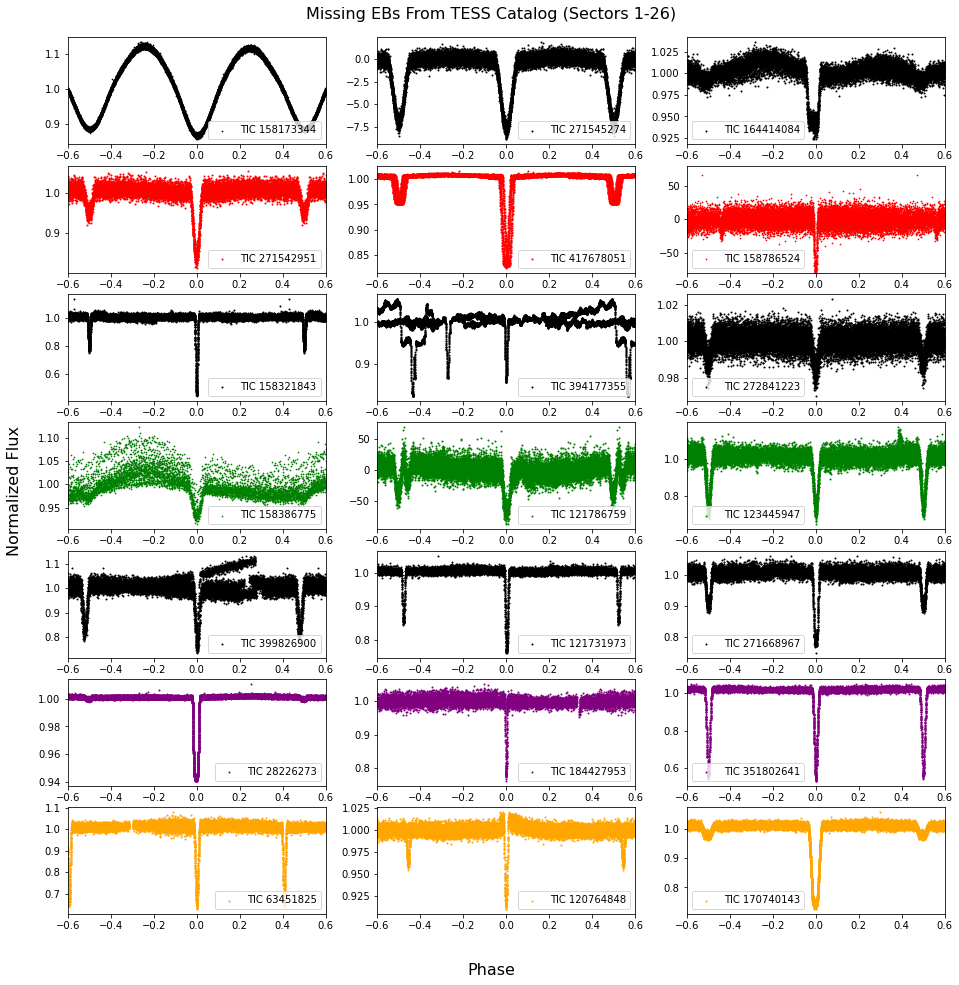

In [17]:
fig, ax = plt.subplots(7, 3, sharex=False, figsize=(14, 14)) #don't share the x axis, it completely ruins the plots
fig.suptitle('Missing EBs From TESS Catalog (Sectors 1-26)', fontsize=16)
fig.text(0.5, 0.02, 'Phase', ha='center',fontsize=16)
fig.text(0.02, 0.5, 'Normalized Flux', va='center', rotation='vertical',fontsize=16)
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08)

# Define metadata for each target, ensuring custom color, inverting for negative fluxes, position, point size.
targets = [ #could automate this f
    {"index": 0, "period": 0.89291993, "label": "TIC 158173344", "epoch time": 1683.35612, "pos": (0,0), "color": "black", "invert": False, "s": 0.5},
    {"index": 1, "period": 1.546289, "label": "TIC 271545274", "epoch time": 1683.35624,"pos": (0,1), "color": "black", "invert": True, "s": 1},
    {"index": 2, "period": 3.905597, "label": "TIC 164414084", "pos": (0,2), "epoch time": 1683.36422,"color": "black", "invert": False, "s": 1},
    {"index": 3, "period": 4.007705, "label": "TIC 271542951", "pos": (1,0),"epoch time": 3334.1230258120218, "color": "r", "invert": False, "s": 1},
    {"index": 4, "period": proper_periods[4], "label": "TIC 417678051", "epoch time": 2408.3715923784175,"pos": (1,1), "color": "r", "invert": False, "s": 1},
    {"index": 5, "period": 7.095207, "label": "TIC 158786524", "pos": (1,2),"epoch time": 1683.35608, "color": "r", "invert": True, "s": 0.5, "ylim": (-80, 80)},
    {"index": 6, "period": 8.429438, "label": "TIC 158321843","epoch time": 2010.26923, "pos": (2,0), "color": "black", "invert": False, "s": 1},
    {"index": 7, "period": 8.653092, "label": "TIC 394177355", "epoch time": 1699.14005404,"pos": (2,1), "color": "black", "invert": False, "s": 1},
    {"index": 8, "period": 1.175878, "label": "TIC 272841223", "epoch time": 2419.99189,"pos": (2,2), "color": "black", "invert": False, "s": 1},
    {"index": 9, "period": 1.570919, "label": "TIC 158386775", "epoch time": 1683.36394,"pos": (3,0), "color": "green", "invert": False, "s": 0.5, "bin": True},
    {"index": 10, "period": 9.524076, "label": "TIC 121786759", "epoch time": 1683.35671,"pos": (3,1), "color": "green", "invert": True, "s": 1},
    {"index": 11, "period": 6.207461, "label": "TIC 123445947", "epoch time": 3316.7028932259013,"pos": (3,2), "color": "green", "invert": False, "s": 1},
    {"index": 12, "period": proper_periods[12], "label": "TIC 399826900","epoch time": 3331.0893231114283, "pos": (4,0), "color": "black", "invert": False, "s": 1},
    {"index": 13, "period": proper_periods[13], "label": "TIC 121731973","epoch time": 1683.36381, "pos": (4,1), "color": "black", "invert": False, "s": 1},
    {"index": 14, "period": 7.649413, "label": "TIC 271668967", "pos": (4,2),"epoch time": 3334.9889576742225, "color": "black", "invert": False, "s": 1},
    {"index": 15, "period": 5.889372, "label": "TIC 28226273", "pos": (5,0), "epoch time": 423.36798352782944,"color": "purple", "invert": False, "s": 1},
    {"index": 16, "period": 17.844325, "label": "TIC 184427953", "pos": (5,1), "epoch time": 3319.988736480789,"color": "purple", "invert": False, "s": 1},
    {"index": 17, "period": 10.466902, "label": "TIC 351802641", "pos": (5,2),"epoch time": 3314.701803651641, "color": "purple", "invert": False, "s": 1},
    {"index": 18, "period": 14.759479, "label": "TIC 63451825", "pos": (6,0),"epoch time": 3330.4611146076204, "color": "orange", "invert": False, "s": 1},
    {"index": 19, "period": proper_periods[19], "label": "TIC 120764848","epoch time": 1683.35674, "pos": (6,1), "color": "orange", "invert": False, "s": 1},
    {"index": 20, "period": 2.151383, "label": "TIC 170740143", "pos": (6,2),"epoch time": 3339.78163, "color": "orange", "invert": False, "s": 1}
]
for target in targets:
    i = target["index"] #store target data as variables to call
    period = target["period"]
    pos = target["pos"]
    label = target["label"]
    color = target["color"]
    s = target["s"]
    epoch_time = target["epoch time"]
    invert = target.get("invert", False)
    ylim = target.get("ylim", None)
    bin_data = target.get("bin", False)

    lc = plots[i].bin(time_bin_size=period / 300) if bin_data else plots[i]
    og_time = lc.time #ensure the right t0 is used otherwise it won't center. the circus act of shifting the plot is not worth it lol.
    min_index = np.nanargmin(lc.flux) #find locattion of minimum flux with single function call
    estimated_t0 = og_time[min_index].value #get the time val of this min, this did cause an issue for tic 394177355 bc it's werid
    print("maybe t0: ", estimated_t0)
    # Initial fold (no wrap yet) just to find min location
    lc_folded_raw = lc.fold(period, epoch_time = estimated_t0, normalize_phase=True)
    if label == "TIC 394177355":
        lc_folded_raw = lc.fold(period, t0 = 1699.14005404, normalize_phase=True)
        print("TIC 394177355 detected, not using min t0")
        
    lc_folded_raw.time = lc_folded_raw.time * u.dimensionless_unscaled
    phases = np.array(lc_folded_raw.time.value)#index the full one even with respect to another array?
    fluxes = np.array(lc_folded_raw.flux.value)#combine fractions of a folded plot
    print("raw phase:", phases)
    print("raw flux:",fluxes)
    aliased_phases = np.concatenate([phases[phases > 0.4]-1, phases, phases[phases < -0.4]+1]) #limit the phase range
    aliased_fluxes = np.concatenate([fluxes[phases > 0.4], fluxes, fluxes[phases < -0.4]]) 
    print("aliased phases:", aliased_phases)
    
    min_phase = aliased_phases[np.nanargmin(aliased_fluxes)]
    print("min phase: ", min_phase)
    # Check if primary eclipse is already near 0 (within tolerance)
    
   
    
    norm_flux = aliased_fluxes / np.nanmean(aliased_fluxes)
    print("norm flux:", norm_flux)
    
    if invert:
        norm_flux *= -1
        
#     sort_idx = np.argsort(shifted_phases)
#     final_phases = final_phases[sort_idx]
#     final_flux = final_flux[sort_idx]
    # Keep only data in [-0.6, 0.6]
    ax[pos].scatter(aliased_phases, norm_flux, label=label, color=color, s=s)
    ax[pos].legend(loc='lower right' if pos[1] in [0, 1] else 'lower left')
    ax[pos].set_xlim(-0.6, 0.6)
    if ylim:
        ax[pos].set_ylim(*ylim)


TIC 158786524 does not reach phase +0.6 (max phase: 0.59)
Phase mask: [ True  True  True ... False False False]
Plotting extra for  TIC 158786524


TIC 272841223 does not reach phase +0.6 (max phase: 0.10)
Phase mask: [ True  True  True ... False False False]
Plotting extra for  TIC 272841223


TIC 123445947 does not reach phase +0.6 (max phase: 0.10)
Phase mask: [False False False ... False False False]
Plotting extra for  TIC 123445947


TIC 399826900 does not reach phase +0.6 (max phase: 0.10)
Phase mask: [False False False ... False False False]
Plotting extra for  TIC 399826900


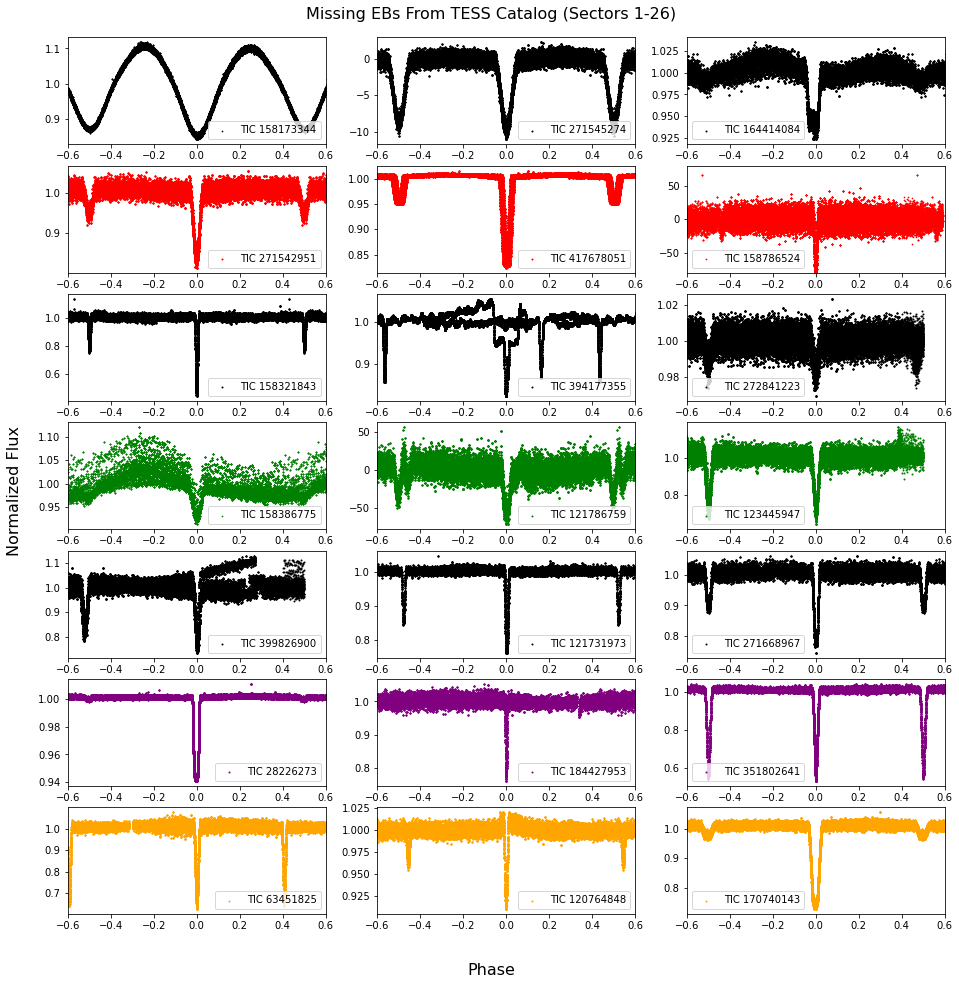

In [25]:
#code for plotting light curves of all missing kepler targets from TESS catalog, plotted +/-0.6 phase to see full shape of eclipse

fig, ax = plt.subplots(7, 3, sharex=False, figsize=(14, 14)) #don't share the x axis, it completely ruins the plots
fig.suptitle('Missing EBs From TESS Catalog (Sectors 1-26)', fontsize=16)
fig.text(0.5, 0.02, 'Phase', ha='center',fontsize=16)
fig.text(0.02, 0.5, 'Normalized Flux', va='center', rotation='vertical',fontsize=16)
fig.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.08)

# Define metadata for each target, ensuring custom color, inverting for negative fluxes, position, point size.
targets = [
    {"index": 0, "period": 0.89291993, "label": "TIC 158173344", "epoch time": 1683.35612, "pos": (0,0), "color": "black", "invert": False, "s": 0.5},
    {"index": 1, "period": 1.546289, "label": "TIC 271545274", "epoch time": 1683.35624,"pos": (0,1), "color": "black", "invert": True, "s": 1},
    {"index": 2, "period": 3.905597, "label": "TIC 164414084", "pos": (0,2), "epoch time": 1683.36422,"color": "black", "invert": False, "s": 1},
    {"index": 3, "period": 4.007705, "label": "TIC 271542951", "pos": (1,0),"epoch time": 3334.1230258120218, "color": "r", "invert": False, "s": 1},
    {"index": 4, "period": proper_periods[4], "label": "TIC 417678051", "epoch time": 2408.3715923784175,"pos": (1,1), "color": "r", "invert": False, "s": 1},
    {"index": 5, "period": 7.095207, "label": "TIC 158786524", "pos": (1,2),"epoch time": 1683.35608, "color": "r", "invert": True, "s": 0.5, "ylim": (-80, 80)},
    {"index": 6, "period": 8.429438, "label": "TIC 158321843","epoch time": 2010.26923, "pos": (2,0), "color": "black", "invert": False, "s": 1},
    {"index": 7, "period": 8.653092, "label": "TIC 394177355", "epoch time": 1683.35675,"pos": (2,1), "color": "black", "invert": False, "s": 1},
    {"index": 8, "period": 1.175878, "label": "TIC 272841223", "epoch time": 2419.99189,"pos": (2,2), "color": "black", "invert": False, "s": 1},
    {"index": 9, "period": 1.570919, "label": "TIC 158386775", "epoch time": 1683.36394,"pos": (3,0), "color": "green", "invert": False, "s": 0.5, "bin": True},
    {"index": 10, "period": 9.524076, "label": "TIC 121786759", "epoch time": 1683.35671,"pos": (3,1), "color": "green", "invert": True, "s": 1},
    {"index": 11, "period": 6.207461, "label": "TIC 123445947", "epoch time": 3316.7028932259013,"pos": (3,2), "color": "green", "invert": False, "s": 1},
    {"index": 12, "period": proper_periods[12], "label": "TIC 399826900","epoch time": 3331.0893231114283, "pos": (4,0), "color": "black", "invert": False, "s": 1},
    {"index": 13, "period": proper_periods[13], "label": "TIC 121731973","epoch time": 1683.36381, "pos": (4,1), "color": "black", "invert": False, "s": 1},
    {"index": 14, "period": 7.649413, "label": "TIC 271668967", "pos": (4,2),"epoch time": 3334.9889576742225, "color": "black", "invert": False, "s": 1},
    {"index": 15, "period": 5.889372, "label": "TIC 28226273", "pos": (5,0), "epoch time": 423.36798352782944,"color": "purple", "invert": False, "s": 1},
    {"index": 16, "period": 17.844325, "label": "TIC 184427953", "pos": (5,1), "epoch time": 3319.988736480789,"color": "purple", "invert": False, "s": 1},
    {"index": 17, "period": 10.466902, "label": "TIC 351802641", "pos": (5,2),"epoch time": 3314.701803651641, "color": "purple", "invert": False, "s": 1},
    {"index": 18, "period": 14.759479, "label": "TIC 63451825", "pos": (6,0),"epoch time": 3330.4611146076204, "color": "orange", "invert": False, "s": 1},
    {"index": 19, "period": proper_periods[19], "label": "TIC 120764848","epoch time": 1683.35674, "pos": (6,1), "color": "orange", "invert": False, "s": 1},
    {"index": 20, "period": 2.151383, "label": "TIC 170740143", "pos": (6,2),"epoch time": 3339.78163, "color": "orange", "invert": False, "s": 1}
]
for target in targets:
    i = target["index"] 
    period = target["period"]
    pos = target["pos"]
    label = target["label"]
    color = target["color"]
    s = target["s"]
    epoch_time = target["epoch time"]
    invert = target.get("invert", False)
    ylim = target.get("ylim", None)
    bin_data = target.get("bin", False)

    lc = plots[i].bin(time_bin_size=period / 300) if bin_data else plots[i]
    extended_lc = lc.append(lc.copy(lc.time + period))
    extended_lc = extended_lc.append(lc.copy(lc.time - period)) #this and above for ensuring phase extends to 0.6
    #^cloning data at different points and appending to have a wide range
    
    # Step 1: Fold with initial epoch shift to roughly center primary eclipse
    lc_folded = extended_lc.fold(period, epoch_time=epoch_time + period * 0.6,
                        normalize_phase=True, wrap_phase=0.6 * u.dimensionless_unscaled)
    lc_folded.time = lc_folded.time * u.dimensionless_unscaled  # ensure units

    # Step 2: Detect phase of primary eclipse (min flux)
    phases = ((lc_folded.time.value + 0.6) % 1) - 0.6 #declare this right away to ensure phases are adjusted for 0.6 interval
    fluxes = lc_folded.flux.value
    min_phase = phases[np.nanargmin(fluxes)]
    tolerance = 0.02  # only shift if offset significantly
    shift = -min_phase if abs(min_phase) > tolerance else 0.0

    # Step 3: Apply shift if needed
    
    upper_limit = 0.9  
    lower_limit = -0.9
   
    raw_shifted_phases = (phases + shift)

    shifted_phases = np.where( #shift phases if the primary eclipse is not at 0, even if t0 is right
    raw_shifted_phases > upper_limit,
    raw_shifted_phases - 1.0,
    np.where(raw_shifted_phases < lower_limit, raw_shifted_phases + 1.0, raw_shifted_phases))
    
    norm_flux = fluxes / np.nanmean(fluxes)

    # Optional: invert flux if specified
    if invert:
        norm_flux *= -1

    # Step 4: Also process extended LC for negative wrap around
    lc_extended_folded = extended_lc.fold(period, epoch_time=epoch_time + period * 0.6,normalize_phase=True)
    lc_extended_folded.time = lc_extended_folded.time * u.dimensionless_unscaled
    ext_phases = ((lc_extended_folded.time.value + 0.6 + shift) % 1) - 0.6
    
    raw_ext_phases = (ext_phases + shift)
    ext_shifted_phases = np.where(
    raw_ext_phases > upper_limit,
    raw_ext_phases - 1.0,
    np.where(raw_ext_phases < lower_limit, raw_ext_phases + 1.0, raw_ext_phases)
)
    ext_flux = lc_extended_folded.flux.value / np.nanmean(lc_extended_folded.flux.value)

    if invert:
        ext_flux *= -1
    
    if np.nanmax(shifted_phases) < 0.6:
        print(f"{label} does not reach phase +0.6 (max phase: {np.nanmax(shifted_phases):.2f})")
             # Re-fold the raw data without shifting or wrapping
        folded_extra = plots[i].fold(period, epoch_time=epoch_time+period)
        folded_extra.time = folded_extra.time * u.dimensionless_unscaled

        # Extract only the range [0.4, 0.6]
        extra_phase = ((folded_extra.time.value + 0.5) % 1) - 0.5
        mask = (extra_phase > 0.4) & (extra_phase <= 0.6)
        print("Phase mask:", mask)
        extra_flux = folded_extra.flux.value[mask] / np.nanmean(folded_extra.flux.value)

        if invert:
            extra_flux *= -1
        print("Plotting extra for ", label)
        ax[pos].scatter(extra_phase[mask], extra_flux, color=color, s=s)
        ax[pos].scatter(extra_phase[mask]+1, extra_flux, color=color, s=s)
    # Step 5: Plot both halves
    ax[pos].scatter(shifted_phases, norm_flux, label=label, color=color, s=s)
    ax[pos].scatter(ext_phases, ext_flux, color=color, s=s)
    ax[pos].legend(loc='lower right' if pos[1] in [0, 1] else 'lower left')
    
    ax[pos].set_xlim(-0.6, 0.6)
    
    if ylim:
        ax[pos].set_ylim(*ylim)


In [27]:
# checking t0. manually entered each target to see, or could go through a list
lc = lk.search_lightcurve("TIC 399826900", cadence = "short").download().remove_nans()
smoothed_lc = lc.bin(time_bin_size=0.001)  # adjust bin size as needed

# Step 1: Get flux and time arrays
flux = smoothed_lc.flux
time = smoothed_lc.time

# Step 2: Find index of minimum flux (primary eclipse)
min_index = np.nanargmin(flux)
estimated_t0 = time[min_index].value  # This is your new epoch_time

print(f"Estimated T0 from flux minimum: {estimated_t0}")

/home/rbanerjee02/anaconda3/lib/python3.9/site-packages/lightkurve/search.py:424: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Estimated T0 from flux minimum: 3331.0893231114283


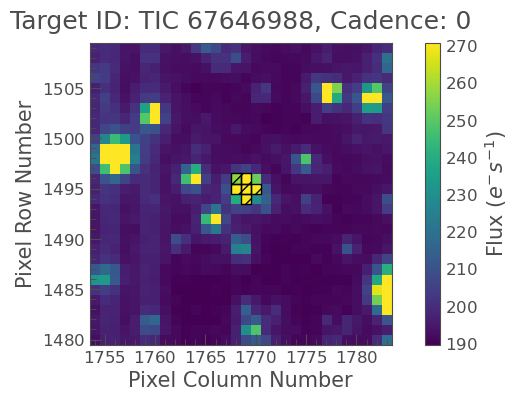

In [6]:
#ran each target through this search to ensure target's signal does not overlap with neighbors, checked neighbors on mast.
search_result = lk.search_tesscut("TIC 67646988",sector= 21)
tpf = search_result.download(cutout_size=30)

target_mask = tpf.create_threshold_mask(threshold=20, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels
tpf.plot(aperture_mask=target_mask, mask_color='k');


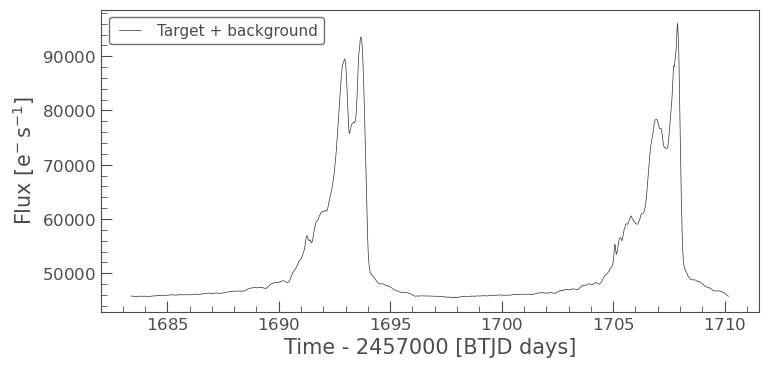

In [9]:
target_lc = tpf.to_lightcurve(aperture_mask=target_mask)
target_lc.plot(label='Target + background');